In [69]:
import pandas as pd
import numpy as np

In [70]:
df=pd.read_csv("water_quality.csv")

In [71]:
df.shape

(3276, 10)

In [72]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [73]:
#df.isnull().sum()

In [74]:
df.fillna(0,inplace=True)

In [75]:
df.head(3)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  0.000000  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246    0.000000    592.885359   
2  8.099124  224.236259  19909.541732     9.275884    0.000000    418.606213   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0

In [76]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      6.019540   196.369496  22014.092526     7.122277   254.203468   
std       2.924207    32.879761   8768.570828     1.583085   146.765192   
min       0.000000    47.432000    320.942611     0.352000     0.000000   
25%       5.283146   176.850538  15666.690297     6.127421   240.722848   
50%       6.735249   196.967627  20927.833607     7.130299   318.660382   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        63.112960     3.966786     0.390110  
std       80.824064        3.308162        21.353531     0.780382     0.487849  
min      181.483754        2.200000         0.000000     1.450000     0.000000  
25%      365.734414       12.065801        53.793688     3.439711     0.000000  
50%      421.884968       14.218338        65.445962     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

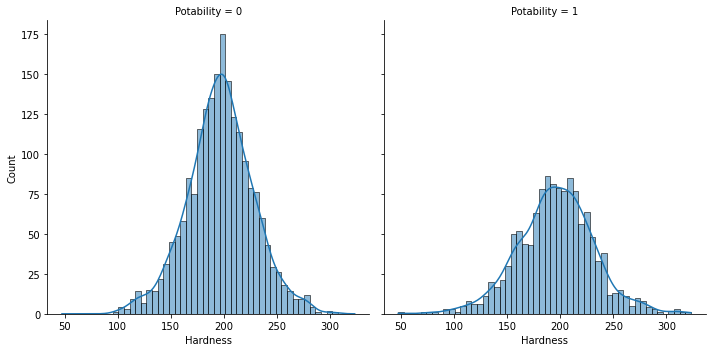

In [78]:
sns.displot(data=df, x="Hardness", col="Potability", kde=True)

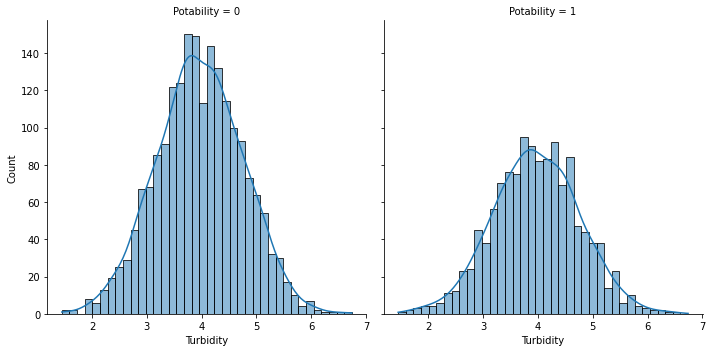

In [79]:
sns.displot(data=df, x="Turbidity", col="Potability", kde=True)

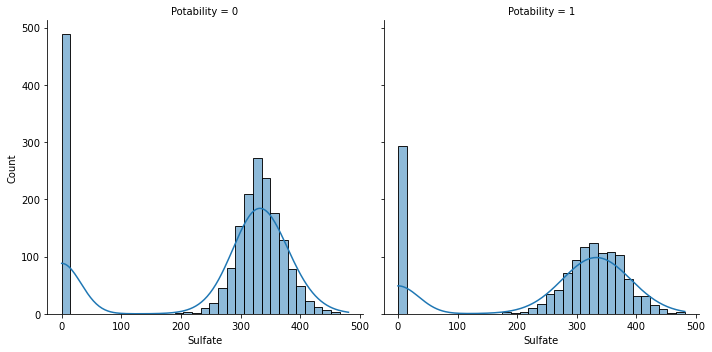

In [80]:
sns.displot(data=df, x="Sulfate", col="Potability", kde=True)

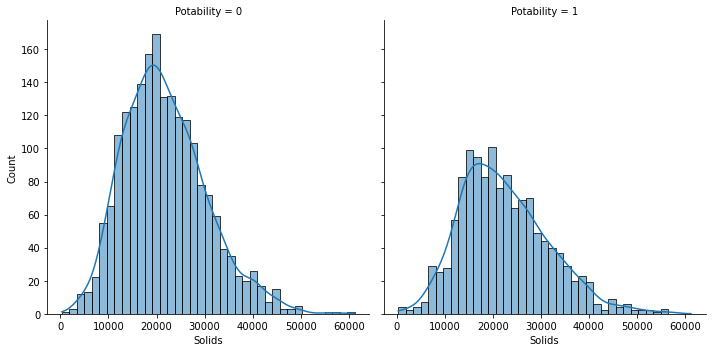

In [81]:
sns.displot(data=df, x="Solids", col="Potability", kde=True)

In [82]:
danger=df['Turbidity'].values>5.0

In [83]:
#df["hh"]=danger

In [84]:
#df.head(3)

In [85]:
df2 = pd.DataFrame(danger, columns = ['turbidity'])
  

In [86]:
df2.head(3)

turbidity
0      False
1      False
2      False

In [87]:
df2.turbidity.unique()

array([False,  True])

In [88]:
danger1=df['Trihalomethanes'].values> 80
df2["Trihalomethanes"] = danger1


In [89]:
danger2=df['Organic_carbon'].values>25
df2["Organic_carbon"] = danger2

In [90]:
danger3=df['Conductivity'].values> 400
df2["Conductivity"] = danger3

In [91]:
danger4=df['Sulfate'].values> 250
df2["Sulfate"] = danger4

In [92]:
danger5=df['Chloramines'].values> 4
df2["Chloramines"] = danger5

In [93]:
danger6=df['Solids'].values> 500
df2["TDS"] = danger6

In [94]:
danger7=df['Hardness'].values> 180
df2["Hardness"] = danger7

In [95]:
df2["Potability"]=df["Potability"]

In [96]:
df2.head()

turbidity  Trihalomethanes  Organic_carbon  Conductivity  Sulfate  \
0      False             True           False          True     True   
1      False            False           False          True    False   
2      False            False           False          True    False   
3      False             True           False         False     True   
4      False            False           False         False     True   

   Chloramines   TDS  Hardness  Potability  
0         True  True      True           0  
1         True  True     False           0  
2         True  True      True           0  
3         True  True      True           0  
4         True  True      True           0

In [99]:
df.head(3)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  0.000000  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246    0.000000    592.885359   
2  8.099124  224.236259  19909.541732     9.275884    0.000000    418.606213   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0

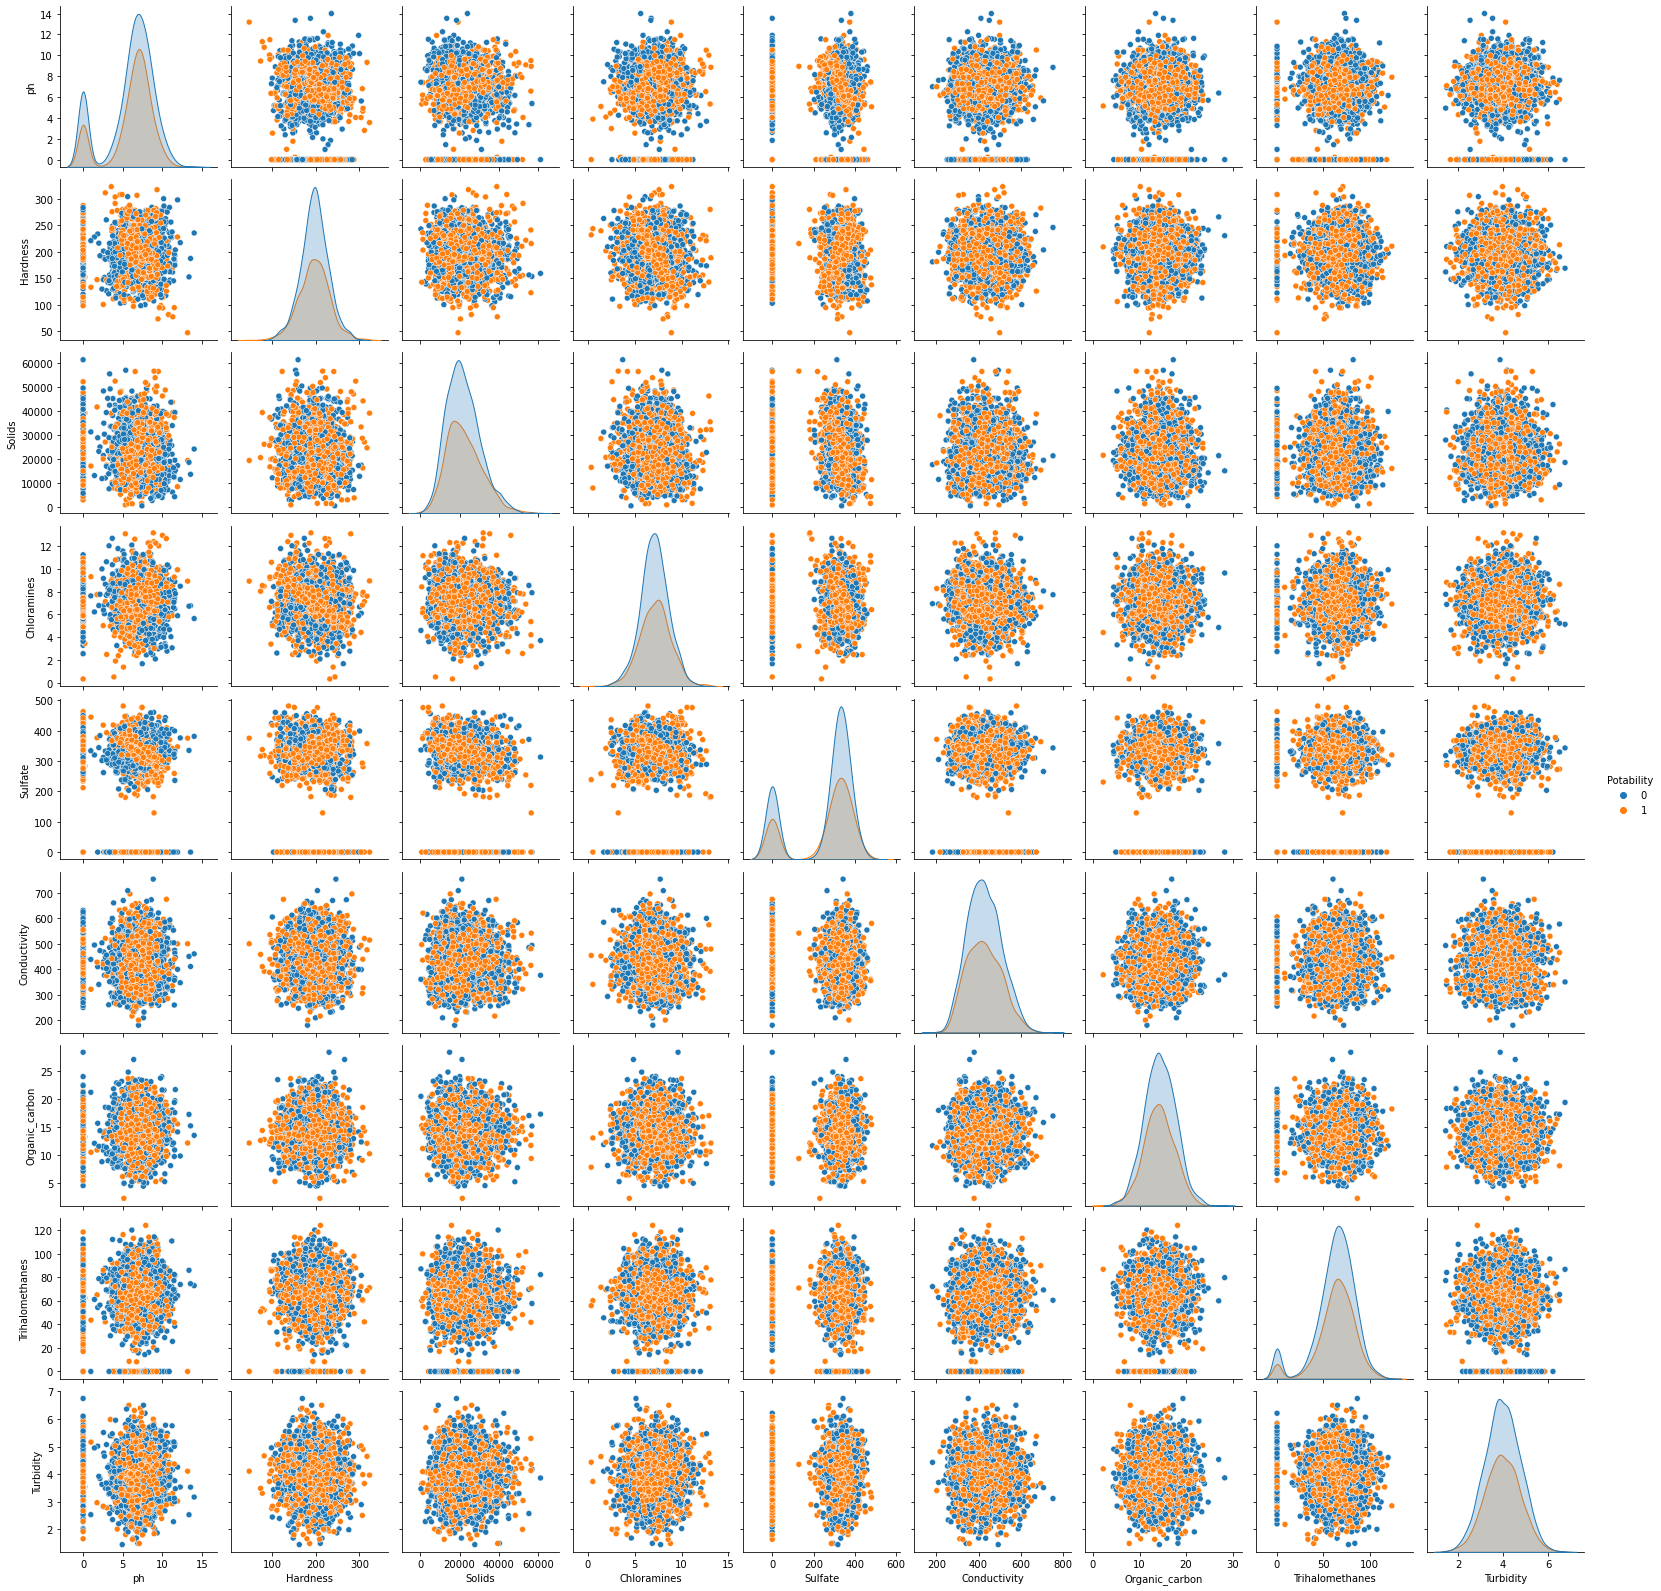

In [104]:
sns.pairplot(df,hue='Potability')

In [106]:
import warnings
warnings.filterwarnings('ignore')

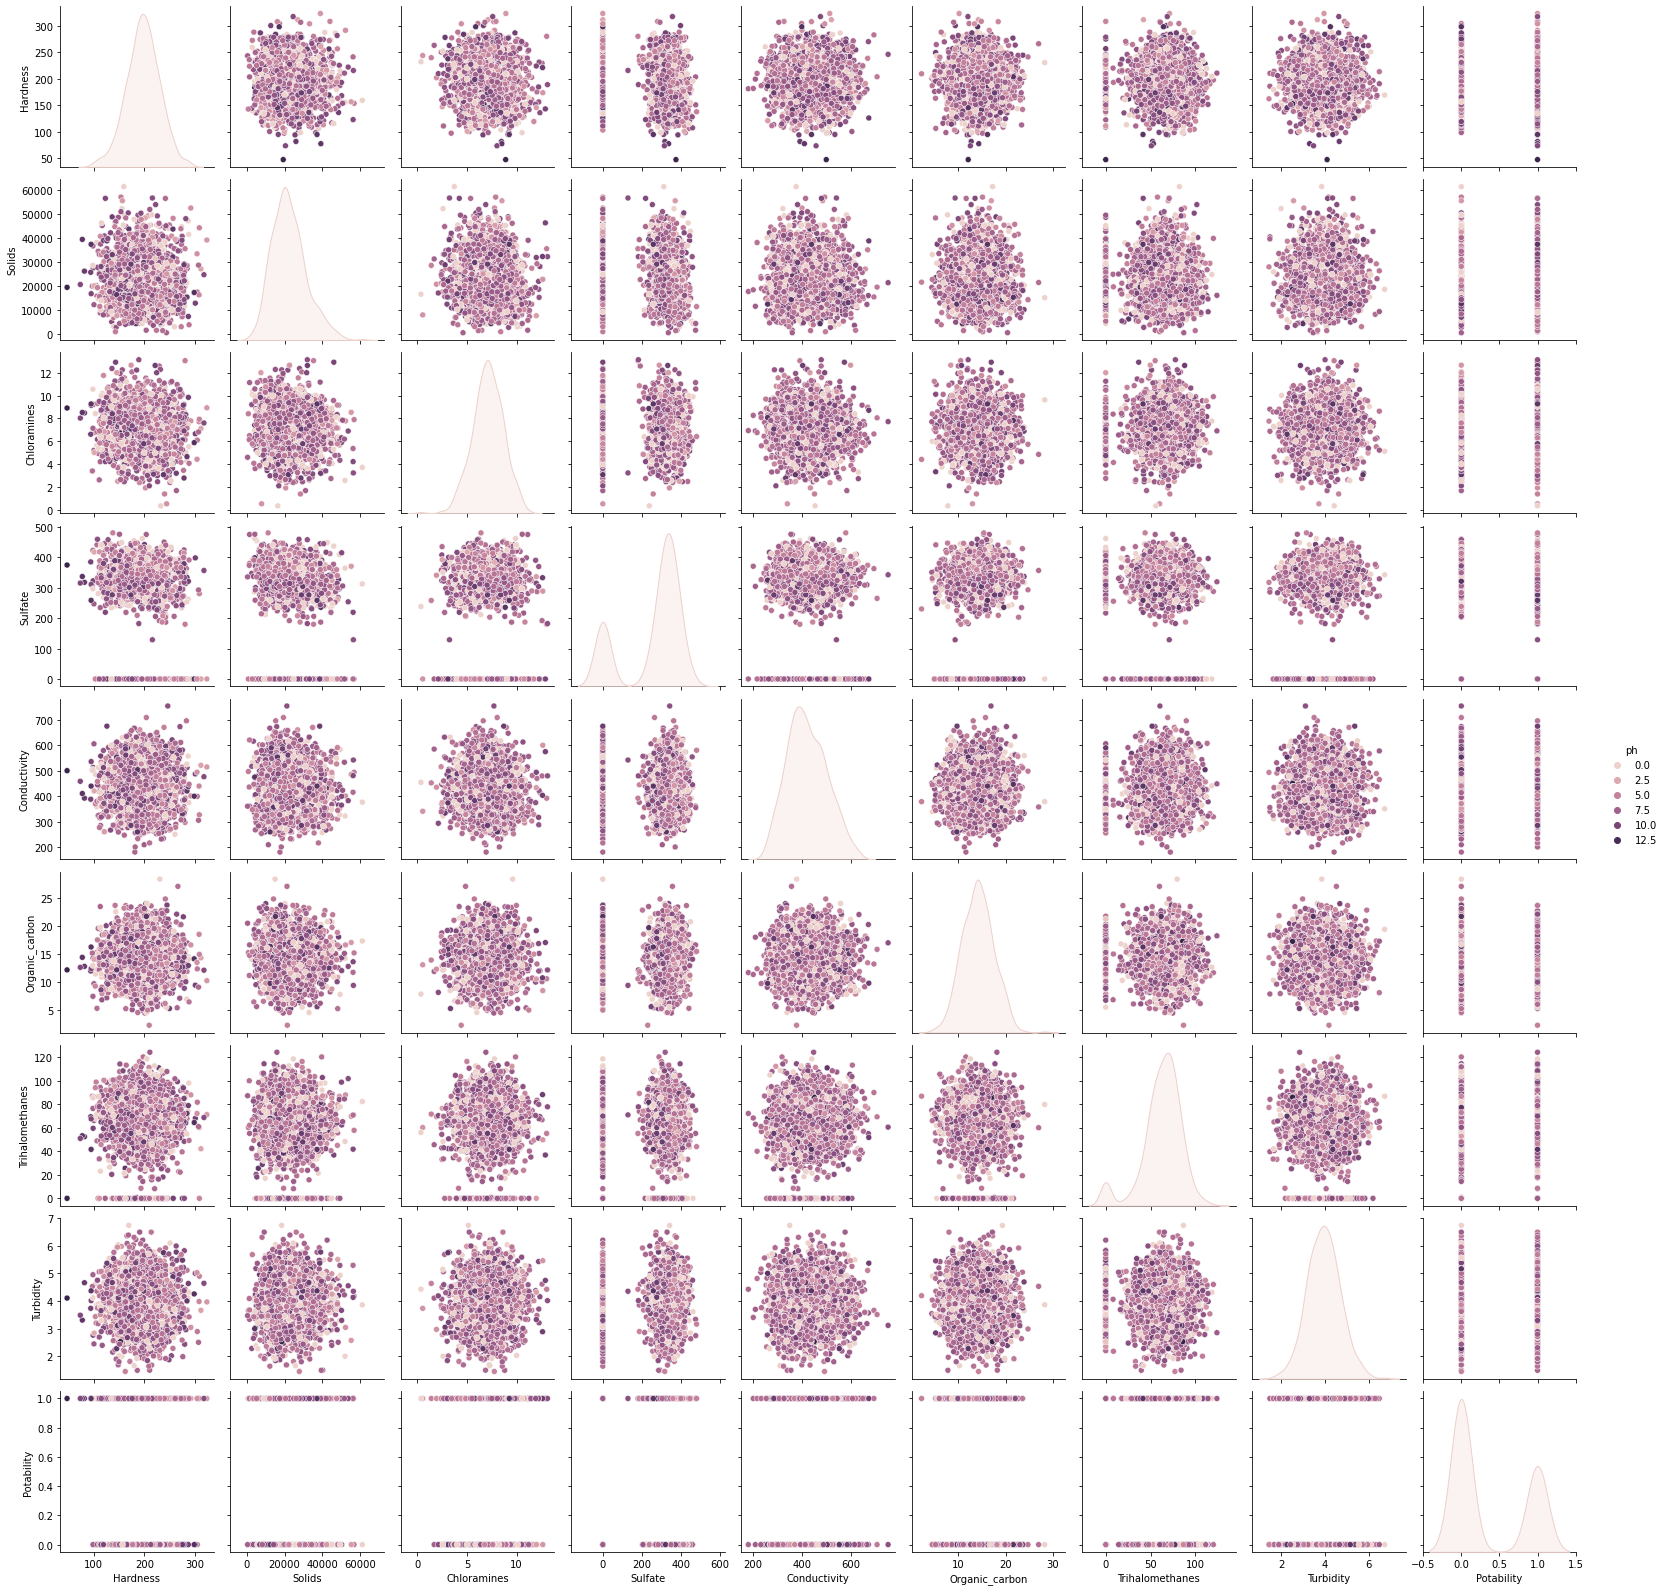

In [107]:
sns.pairplot(df,hue='ph')

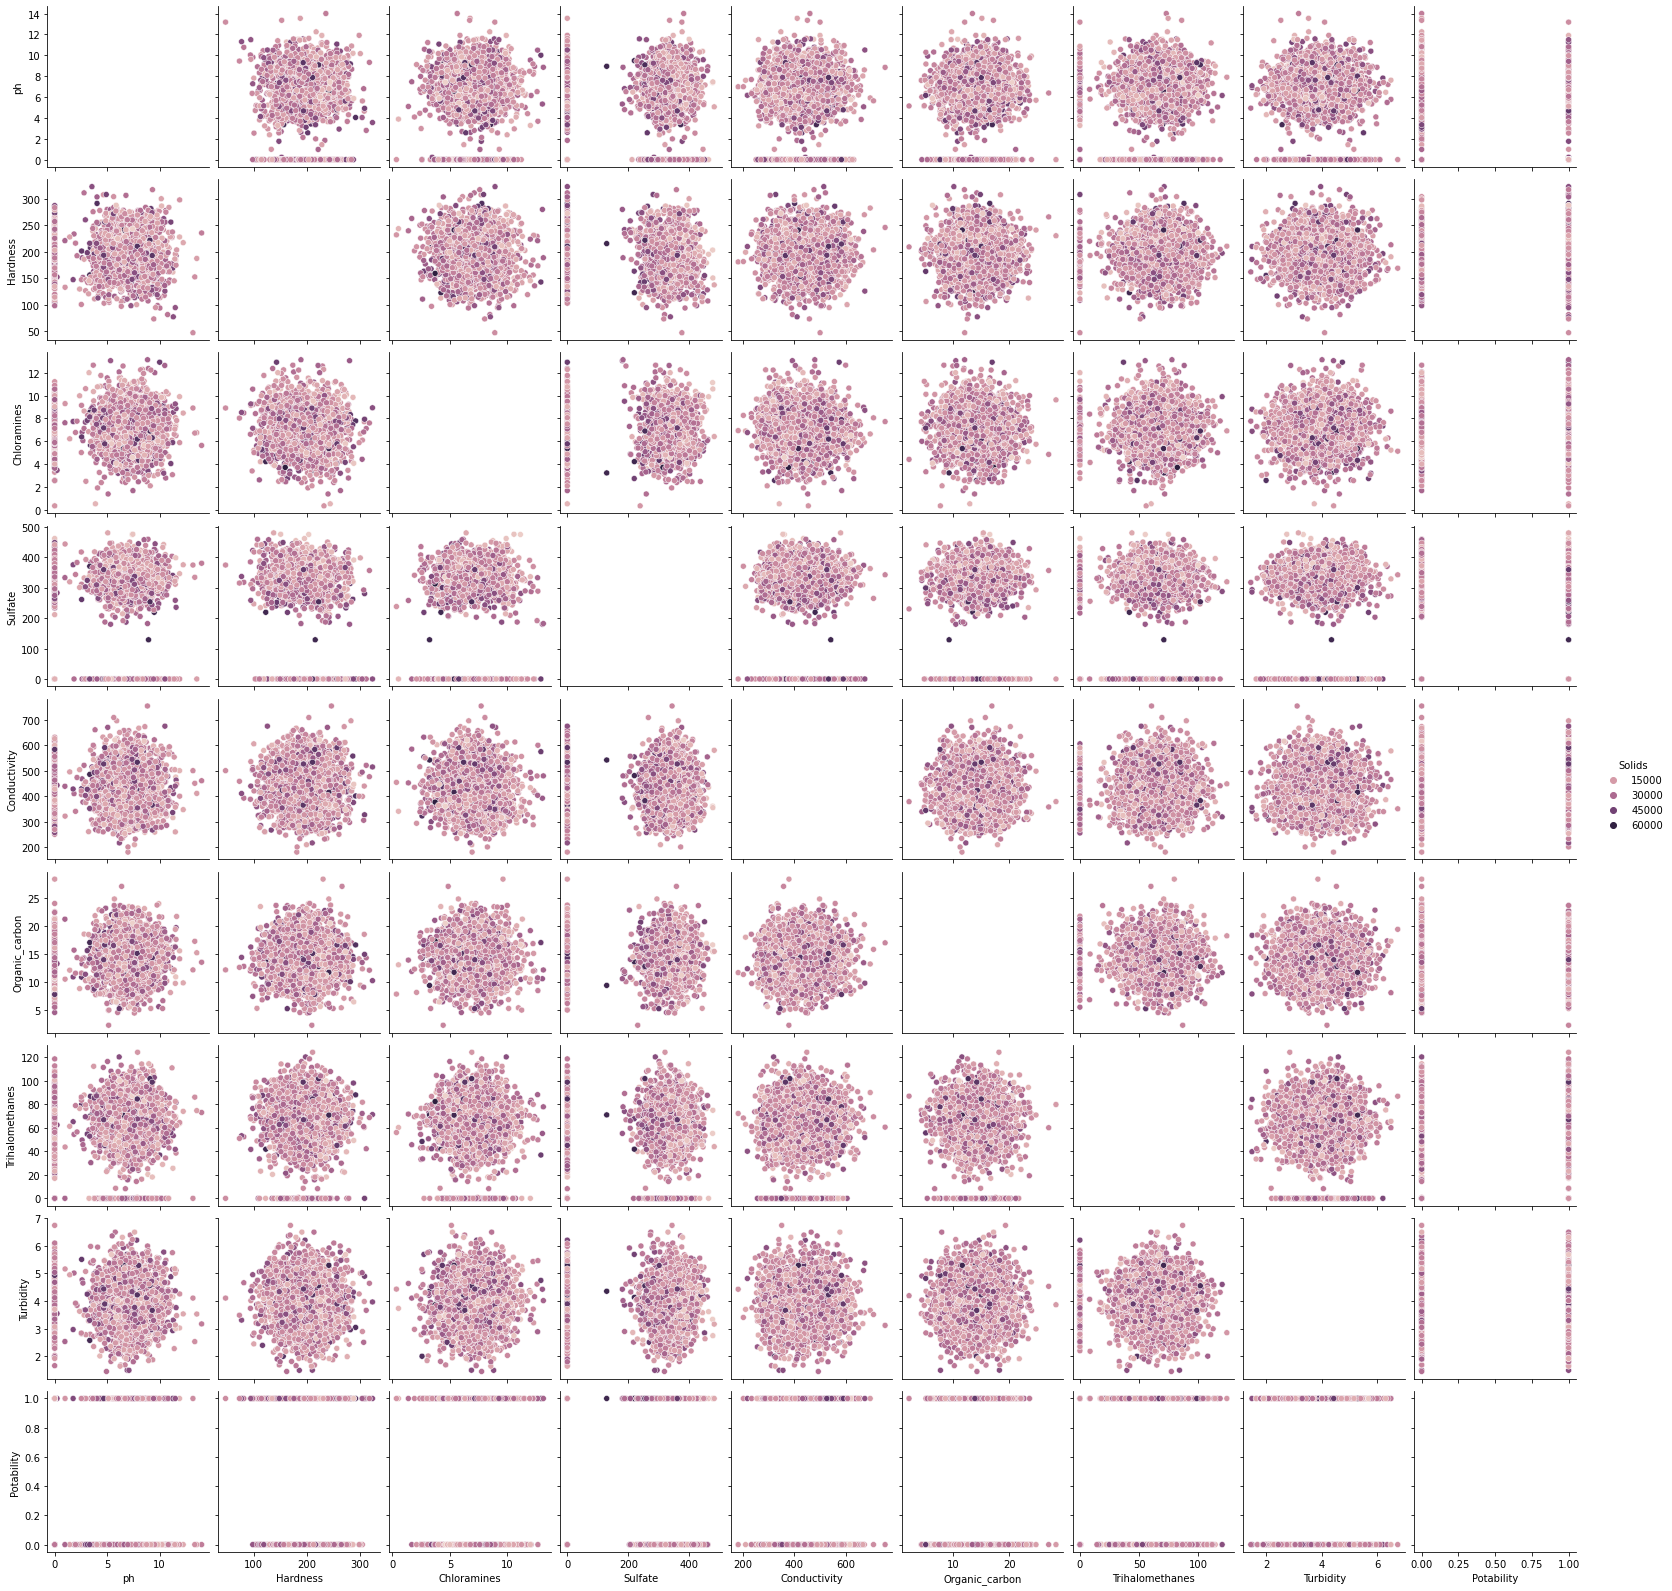

In [108]:
sns.pairplot(df,hue='Solids')

In [116]:
from sklearn.model_selection import train_test_split

In [118]:
X=df.drop(["Potability"], axis=1)

y=df["Potability"]


In [137]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [138]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)

In [139]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [140]:
ypred=classifier.predict(x_test)

In [141]:
classifier.score(x_test, y_test)

0.5746951219512195

In [128]:
classifier.score(x_test, y_test)

0.5746951219512195

In [142]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, ypred)

0.4253048780487805

In [143]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

In [144]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [146]:
model = DecisionTreeClassifier()

In [147]:
result = []
model.fit(X_train, y_train)
result.append(model.score(X_test, y_test))

In [148]:
result

[0.5818921668362157]

In [149]:
models = [
     LogisticRegression(),
    SVC(),
     MLPClassifier(),
     DecisionTreeClassifier(),
     AdaBoostClassifier(),
     BaggingClassifier(),
     GradientBoostingClassifier(),
     RandomForestClassifier()
 ]

model_names = [
     "         Logistic Regression",
     "      Support Vector Machine",
     "              Neural Network",
     "               Decision Tree",
     "         AdaBoost Classifier",
     "          Bagging Classifier",
     "Gradient Boosting Classifier",
     "    Random Forest Classifier"
 ]

In [150]:
results = []
for i in range(len(models)):
    models[i].fit(X_train, y_train)
    results.append(models[i].score(X_test, y_test))

In [151]:
for i in range(len(models)):
     print(model_names[i] + ": {:.5f}".format(results[i]))

         Logistic Regression: 0.59512
      Support Vector Machine: 0.62157
              Neural Network: 0.63581
               Decision Tree: 0.57681
         AdaBoost Classifier: 0.60326
          Bagging Classifier: 0.62258
Gradient Boosting Classifier: 0.64090
    Random Forest Classifier: 0.65209


In [152]:
df.head(3)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  0.000000  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246    0.000000    592.885359   
2  8.099124  224.236259  19909.541732     9.275884    0.000000    418.606213   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0

In [153]:
new_input = [[8.5,180 ,503,6, 257, 407, 28, 85,8]]

In [155]:
for i in range(len(models)):
    new_output = models[i].predict(new_input)
    if new_output ==0:
        print("Not Potable")
    else:
        print("Potable")

Potable
Not Potable
Potable
Potable
Potable
Not Potable
Potable
Not Potable


## Best model accuracy so far :
### Random Forest Classifier - ACCURACY : 65.209% 

## Correct Prediction by :
### Random Forest Classifier , Support Vector Machine , Bagging Classifier models

# As Random Forest Classifier has the best accuracy so far and also is predicting correctly we will go with this particular model